In [1]:
using DelimitedFiles

In [2]:
covidbycountry = DelimitedFiles.readdlm("who_covid_trans.csv",',',header=false);

In [3]:
#? writedlm

In [4]:
covidbycountry

115×213 Array{Any,2}:
 "Date"             "China"       "Singapore"  …   "Mauritania"    "Comoros"
 "1/21/2020"     278             0                0               0         
 "1/22/2020"     309             0                0               0         
 "1/23/2020"     571             0                0               0         
 "1/24/2020"     830             1                0               0         
 "1/25/2020"    1297             3             …  0               0         
 "1/26/2020"    1985             3                0               0         
 "1/27/2020"    2741             4                0               0         
 "1/28/2020"    4537             7                0               0         
 "1/29/2020"    5997             7                0               0         
 "1/30/2020"    7736            10             …  0               0         
 "1/31/2020"    9720            13                0               0         
 "02/01/2020"  11821            16                0   

In [5]:
namesofcolums = covidbycountry[1,:]

213-element Array{Any,1}:
 "Date"             
 "China"            
 "Singapore"        
 "Japan"            
 "Republic of Korea"
 "Philippines"      
 "Australia"        
 "Malaysia"         
 "New Zealand"      
 "Vietnam"          
 "Brunei Darussalam"
 "Cambodia"         
 "Mongolia"         
 ⋮                  
 "South Sudan"      
 "Malawi"           
 "Eritrea"          
 "Angola"           
 "Zimbabwe"         
 "Botswana"         
 "Burundi"          
 "Gambia"           
 "Namibia"          
 "Seychelles"       
 "Mauritania"       
 "Comoros"          

In [6]:
function getindexbycountryname(name::String)
    for i in 1:length(namesofcolums)
        if lowercase(name) == lowercase(namesofcolums[i])
            return i
        end
    end
end

getindexbycountryname (generic function with 1 method)

In [33]:
getindexbycountryname("United States of America")

114

In [8]:
covidbycountry = covidbycountry[2:end,:];

In [9]:
col1 = covidbycountry[:,1]

114-element Array{Any,1}:
 "1/21/2020" 
 "1/22/2020" 
 "1/23/2020" 
 "1/24/2020" 
 "1/25/2020" 
 "1/26/2020" 
 "1/27/2020" 
 "1/28/2020" 
 "1/29/2020" 
 "1/30/2020" 
 "1/31/2020" 
 "02/01/2020"
 "02/02/2020"
 ⋮           
 "05/02/2020"
 "05/03/2020"
 "05/04/2020"
 "05/05/2020"
 "05/06/2020"
 "05/07/2020"
 "05/08/2020"
 "05/09/2020"
 "05/10/2020"
 "05/11/2020"
 "05/12/2020"
 "5/13/2020" 

In [10]:
using Dates

In [11]:
for i in 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "m/d/y")
end

In [12]:
col1

114-element Array{Any,1}:
 2020-01-21T00:00:00
 2020-01-22T00:00:00
 2020-01-23T00:00:00
 2020-01-24T00:00:00
 2020-01-25T00:00:00
 2020-01-26T00:00:00
 2020-01-27T00:00:00
 2020-01-28T00:00:00
 2020-01-29T00:00:00
 2020-01-30T00:00:00
 2020-01-31T00:00:00
 2020-02-01T00:00:00
 2020-02-02T00:00:00
 ⋮                  
 2020-05-02T00:00:00
 2020-05-03T00:00:00
 2020-05-04T00:00:00
 2020-05-05T00:00:00
 2020-05-06T00:00:00
 2020-05-07T00:00:00
 2020-05-08T00:00:00
 2020-05-09T00:00:00
 2020-05-10T00:00:00
 2020-05-11T00:00:00
 2020-05-12T00:00:00
 2020-05-13T00:00:00

In [13]:
dayssince(x) = Dates.datetime2rata(col1[length(col1)]) - Dates.datetime2rata(x)

dayssince (generic function with 1 method)

In [14]:
epidays = Array{Int64}(undef,length(col1));

In [15]:
for i = 1:length(col1)
    epidays[i] = abs(dayssince(col1[i]))
end

In [16]:
epidays = epidays[end:-1:1,end:-1:1];

In [17]:
epidays

114×1 Array{Int64,2}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
   ⋮
 102
 103
 104
 105
 106
 107
 108
 109
 110
 111
 112
 113

In [18]:
covidbycountry[:,1] = epidays;

In [19]:
row,col =size(covidbycountry)
for j = 1:col
    for i = 1:row
        covidbycountry[i,j] = Int(covidbycountry[i,j])
    end
end

In [20]:
covidbycountry = convert(Array{Int64,2},covidbycountry);

In [21]:
#using Pkg
#Pkg.add("Plots")

In [22]:
using Plots

In [23]:
gr()

Plots.GRBackend()

In [24]:
covidbycountry[:,119]

114-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
 19224
 20739
 22088
 23471
 24905
 26025
 27634
 29616
 31522
 33460
 35022
 36327

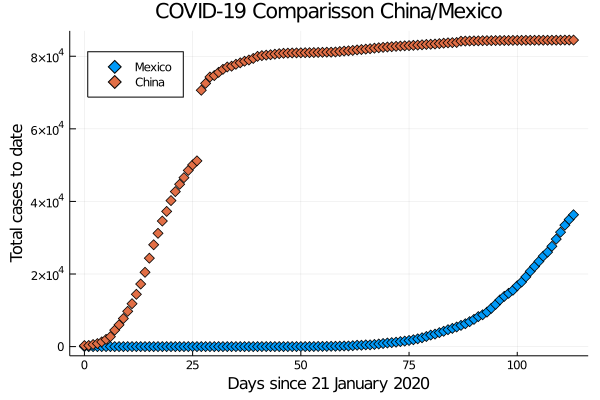

In [37]:
plot(covidbycountry[:,1],[covidbycountry[:,119] covidbycountry[:,2]],linetype= :scatter, 
    legend = :topleft,
    marker= (:diamond,5),
    title = "COVID-19 Comparisson China/Mexico",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["Mexico" "China"]
)

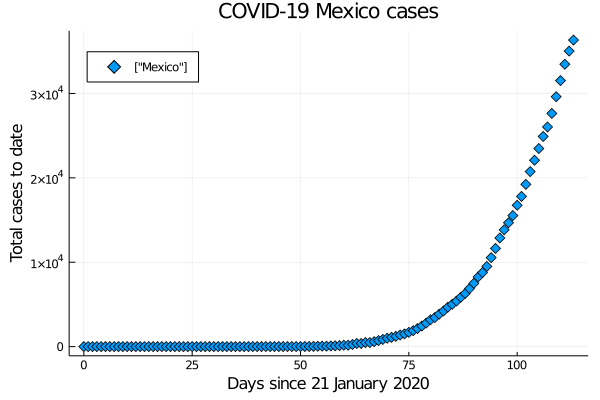

In [29]:
plot(covidbycountry[:,1],covidbycountry[:,119],linetype= :scatter, 
    legend = :topleft,
    marker = (:diamond,5),
    title = "COVID-19 Mexico cases",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["Mexico"]
)

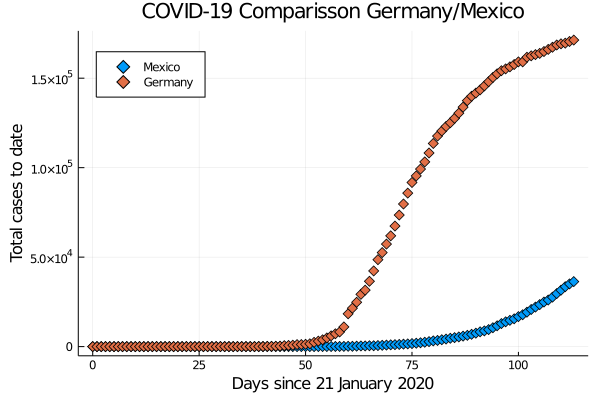

In [36]:
plot(covidbycountry[:,1],[covidbycountry[:,119] covidbycountry[:,25]],linetype= :scatter, 
    legend = :topleft,
    marker= (:diamond,5),
    title = "COVID-19 Comparisson Germany/Mexico",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["Mexico" "Germany"]
)

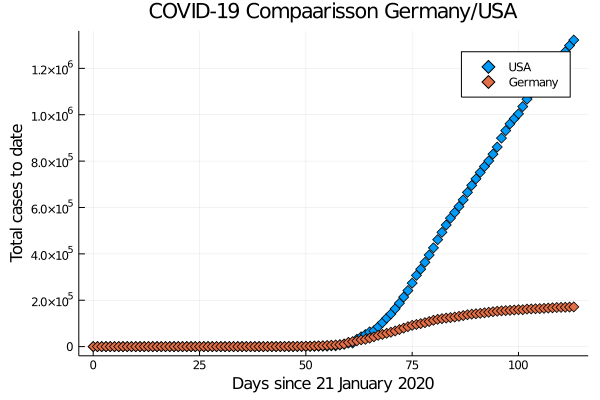

In [34]:
plot(covidbycountry[:,1],[covidbycountry[:,114] covidbycountry[:,25]],linetype= :scatter, 
    marker= (:diamond,5),
    title = "COVID-19 Comparisson Germany/USA",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["USA" "Germany"]
)

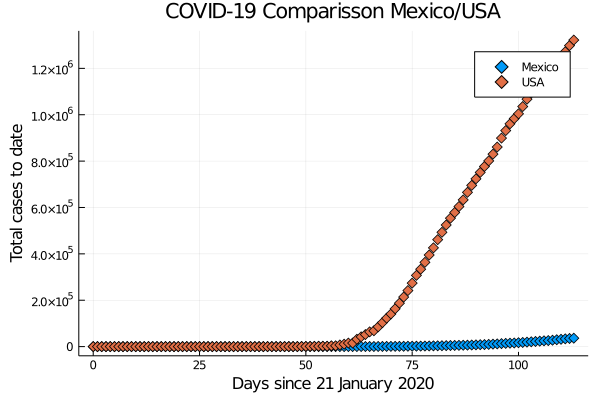

In [35]:
plot(covidbycountry[:,1],[covidbycountry[:,119] covidbycountry[:,114]],linetype= :scatter, 
    marker= (:diamond,5),
    title = "COVID-19 Comparisson Mexico/USA",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["Mexico" "USA"]
)